In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close("all")

In [2]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv',usecols=['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','land_surface_condition','foundation_type'])

In [3]:
#GEO LEVEL   : Region geografica donde se establece la edificacion
#GEO LEVEL 1 : 0-30
#GEO LEVEL 2 : 0-1427
#GEO LEVEL 3 : 0-12567

#4-COUNT FLOORS: Cantidad de pisos de la edificacion

#5-AGE: Anitiguedad de la edificacion

#6-AREA PERCENTAGE: Superficie normalizada que ocupa la edificacion

#7-HEIGHT PERCENTAGE: Altura normalizada de la edificacion

#8-LAND SURFACE CONDITION: Condicion de la superficie donde se construyo

#9-FOUNDATION TYPE: Tipo de cimiento de la edificacion

#10-DAMAGE GRADE: Nivel de daño en la edificacion

In [4]:
values = values.merge(labels, on='building_id')

In [5]:
values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,3
1,28830,8,900,2812,2,10,8,7,o,r,2
2,94947,21,363,8973,2,10,5,5,t,r,3
3,590882,22,418,10694,2,10,6,5,t,r,2
4,201944,11,131,1488,3,30,8,9,t,r,3


Text(0.5, 0, 'Pisos')

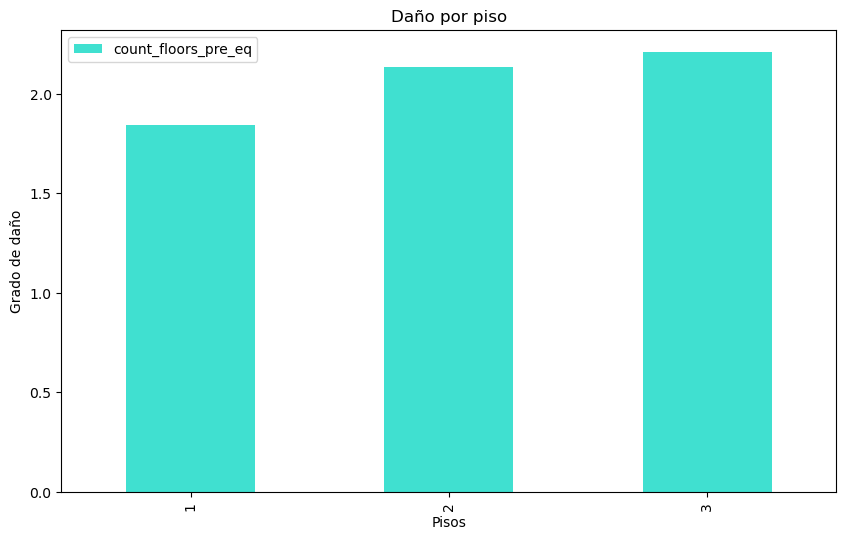

In [6]:
danio_por_pisos = values.groupby('damage_grade').agg({'count_floors_pre_eq':'mean'})
danio_por_pisos.plot(kind='bar',title='Daño por piso',linewidth=2,figsize=(10,6),color='turquoise');
ax=plt.gca()
ax.set_ylabel('Grado de daño')
ax.set_xlabel('Pisos')

In [7]:
geo1 = values.groupby('damage_grade').agg({'geo_level_1_id':'mean'})

In [8]:
geo2 = values.groupby('damage_grade').agg({'geo_level_2_id':'mean'})

In [9]:
geo3 = values.groupby('damage_grade').agg({'geo_level_3_id':'mean'})

In [10]:
geo = geo1.merge(geo2,on='damage_grade')

In [11]:
geo = geo.merge(geo3,on='damage_grade')

In [12]:
geo.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id
damage_grade,,,
1,17.318261,652.934684,6277.995582
2,13.366986,698.234205,6219.954155
3,13.822445,719.770323,6316.542893


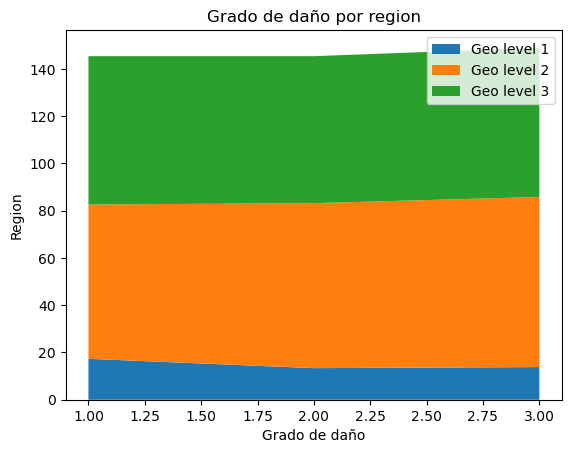

In [13]:
damage_grade = [1,2,3]
geo_levels = {
    'Geo level 1': [17.318261, 13.366986, 13.822445],
    'Geo level 2': [652.934684/10, 698.234205/10, 719.770323/10],
    'Geo level 3': [6277.995582/100, 6219.954155/100, 6316.542893/100]
}

fig, ax = plt.subplots()
ax.stackplot(damage_grade, geo_levels.values(),
             labels=geo_levels.keys())
ax.legend(loc='upper right')
ax.set_title('Grado de daño por region')
ax.set_xlabel('Grado de daño')
ax.set_ylabel('Region')

plt.show()

In [14]:
danio_por_antiguedad = values.groupby('age').agg({'damage_grade':'mean'}).reset_index()
danio_por_antiguedad = danio_por_antiguedad.loc[(danio_por_antiguedad['age'] <= 200)]

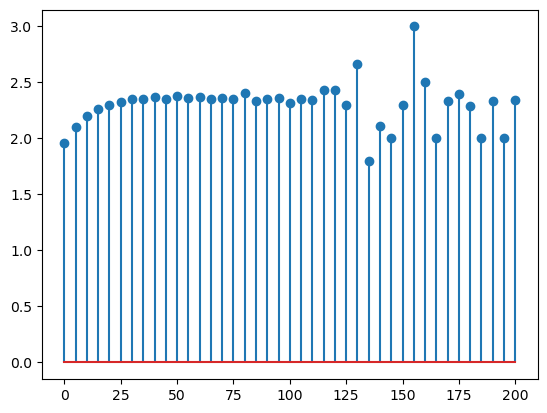

In [20]:
x = danio_por_antiguedad['age']
y = danio_por_antiguedad['damage_grade']

ax.set_title('Grado de daño por region')
ax.set_xlabel('Antiguedad')
ax.set_ylabel('Grado de daño')

plt.stem(x, y)
plt.show()

In [46]:
danio_por_altura = values.groupby('height_percentage').agg({'damage_grade':'mean'}).reset_index()

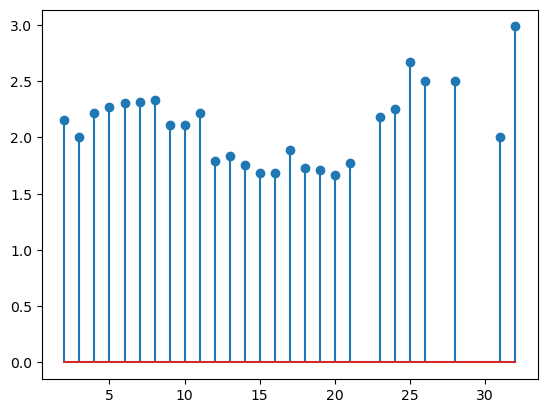

In [47]:
x = danio_por_altura['height_percentage']
y = danio_por_altura['damage_grade']

ax.set_title('Grado de daño por region')
ax.set_xlabel('Antiguedad')
ax.set_ylabel('Grado de daño')

plt.stem(x, y)
plt.show()

In [77]:
danio_por_tamanio = values.groupby('area_percentage').agg({'damage_grade':'mean'})
danio_por_tamanio

,damage_grade
area_percentage,
1,2.188889
2,2.214398
3,2.280139
4,2.261281
5,2.306503
...,...
85,2.250000
86,1.400000
90,2.000000


In [78]:
danio_por_tamanio.max()

damage_grade    3.0
dtype: float64

Text(0.5, 0, 'Tamaño')

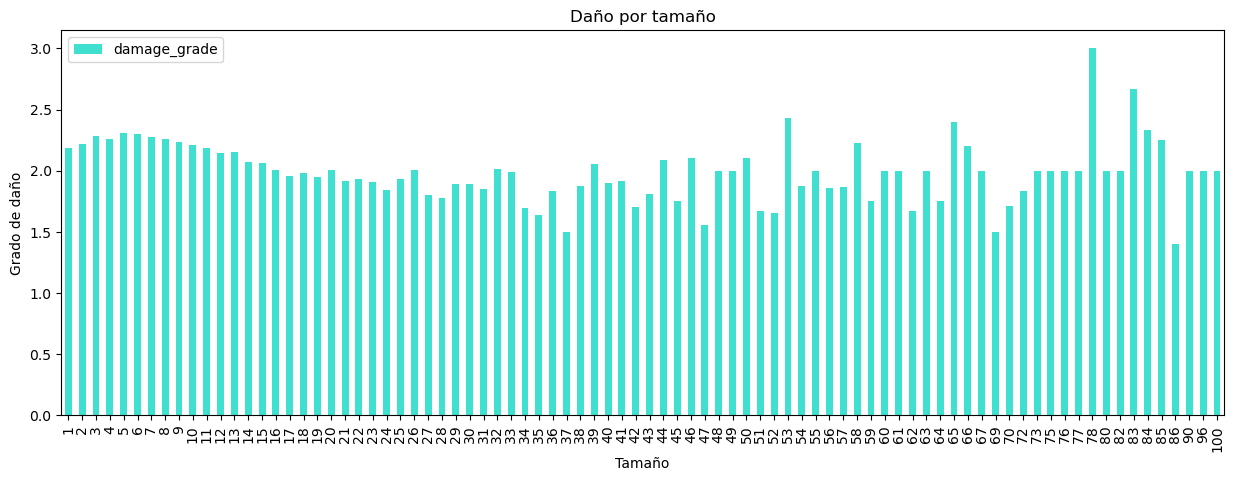

In [79]:
danio_por_tamanio.plot(kind='bar',title='Daño por tamaño',linewidth=2,figsize=(15,5),color='turquoise');
ax=plt.gca()
ax.set_ylabel('Grado de daño')
ax.set_xlabel('Tamaño')